In [ ]:
import requests
import json
import os 

#API key
api_key = os.getenv("api_key")

params = {  
    "api_key": api_key, 
    "engine": "google_flights",
    "departure_id": "CDG",
    "arrival_id": "DXB",
    "outbound_date": "2025-03-02",
    "return_date": "2025-05-04",
    "start": 0,
    "num" : 100
}

search = requests.get("https://serpapi.com/search", params)

response = search.json()
print(json.dumps(response, indent=2))



{
  "search_metadata": {
    "id": "67573bb012dcaa4a74dd5fdf",
    "status": "Success",
    "json_endpoint": "https://serpapi.com/searches/8b8d7301a9b1812d/67573bb012dcaa4a74dd5fdf.json",
    "created_at": "2024-12-09 18:49:20 UTC",
    "processed_at": "2024-12-09 18:49:20 UTC",
    "google_flights_url": "https://www.google.com/travel/flights?hl=en&gl=us&tfs=CBwQAhoeEgoyMDI1LTAzLTAyagcIARIDQ0RHcgcIARIDRFhCGh4SCjIwMjUtMDUtMDRqBwgBEgNEWEJyBwgBEgNDREdCAQFIAXABmAEB",
    "raw_html_file": "https://serpapi.com/searches/8b8d7301a9b1812d/67573bb012dcaa4a74dd5fdf.html",
    "prettify_html_file": "https://serpapi.com/searches/8b8d7301a9b1812d/67573bb012dcaa4a74dd5fdf.prettify",
    "total_time_taken": 6.61
  },
  "search_parameters": {
    "engine": "google_flights",
    "hl": "en",
    "gl": "us",
    "departure_id": "CDG",
    "arrival_id": "DXB",
    "outbound_date": "2025-03-02",
    "return_date": "2025-05-04"
  },
  "best_flights": [
    {
      "flights": [
        {
          "departure_

In [ ]:
import pandas as pd

# Fonction pour récupérer les résultats par pagination
def fetch_flights(params, start, num):
    params["start"] = start
    params["num"] = num
    response = requests.get("https://serpapi.com/search", params)
    if response.status_code == 200:
        return response.json().get("best_flights", [])
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return []

# Itérer sur les pages pour obtenir tous les résultats
all_flights = []
page_size = 10
max_results = 100  
for start in range(0, max_results, page_size):
    flights = fetch_flights(params, start, page_size)
    if not flights:
        break
    all_flights.extend(flights)

# Extraction des données 
flights_data = []
for i, flight in enumerate(all_flights, start=1):
    layover_info = flight.get("layovers", [{}])[0]  
    co2_info = flight.get("carbon_emissions", {})
    flight_info = {
        "flight_id": i,
        "departure_airport": flight["flights"][0]["departure_airport"]["name"],
        "departure_time": flight["flights"][0]["departure_airport"]["time"],
        "arrival_airport": flight["flights"][-1]["arrival_airport"]["name"],
        "arrival_time": flight["flights"][-1]["arrival_airport"]["time"],
        "total_duration": flight.get("total_duration"),
        "price": flight.get("price"),
        "airline": flight["flights"][0].get("airline"),
        "airplane": flight["flights"][0].get("airplane"),
        "travel_class": flight["flights"][0].get("travel_class"),
        "layover_name": layover_info.get("name"),
        "layover_duration": layover_info.get("duration"),
        "CO₂ Emissions": co2_info.get("this_flight"),
    }
    flights_data.append(flight_info)


flights_df = pd.DataFrame(flights_data)
print("Flights DataFrame:")
flights_df

Flights DataFrame:


,flight_id,departure_airport,departure_time,arrival_airport,arrival_time,total_duration,price,airline,airplane,travel_class,layover_name,layover_duration,CO₂ Emissions
0,1,Paris Charles de Gaulle Airport,2025-03-02 11:10,Dubai International Airport,2025-03-02 22:35,505,651,Gulf Air,Airbus A321neo,Economy,Bahrain International Airport,55.0,444000
1,2,Paris Charles de Gaulle Airport,2025-03-02 13:35,Dubai International Airport,2025-03-02 23:20,405,935,Air France,Boeing 777,Economy,None,NaN,452000
2,3,Paris Charles de Gaulle Airport,2025-03-02 10:00,Dubai International Airport,2025-03-02 19:40,400,992,Emirates,Airbus A380,Economy,None,NaN,463000
3,4,Paris Charles de Gaulle Airport,2025-03-02 11:10,Dubai International Airport,2025-03-02 22:35,505,651,Gulf Air,Airbus A321neo,Economy,Bahrain International Airport,55.0,444000
4,5,Paris Charles de Gaulle Airport,2025-03-02 13:35,Dubai International Airport,2025-03-02 23:20,405,935,Air France,Boeing 777,Economy,None,NaN,452000
5,6,Paris Charles de Gaulle Airport,2025-03-02 10:00,Dubai International Airport,2025-03-02 19:40,400,992,Emirates,Airbus A380,Economy,None,NaN,463000
6,7,Paris Charles de Gaulle Airport,2025-03-02 11:10,Dubai International Airport,2025-03-02 22:35,505,651,Gulf Air,Airbus A321neo,Economy,Bahrain International Airport,55.0,444000
7,8,Paris Charles de Gaulle Airport,2025-03-02 13:35,Dubai International Airport,2025-03-02 23:20,405,935,Air France,Boeing 777,Economy,None,NaN,452000
8,9,Paris Charles de Gaulle Airport,2025-03-02 10:00,Dubai International Airport,2025-03-02 19:40,400,992,Emirates,Airbus A380,Economy,None,NaN,463000
9,10,Paris Charles de Gaulle Airport,2025-03-02 11:10,Dubai International Airport,2025-03-02 22:35,505,651,Gulf Air,Airbus A321neo,Economy,Bahrain International Airport,55.0,444000


#Identifier les prix les plus bas sur une période donnée et les visualiser

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Paramètres souhaité
departure_id = 'CDG'  
arrival_id = 'DXB'   
start_date = datetime(2025, 3, 2)
end_date = datetime(2025, 4, 2)
currency = 'EUR'
return_date = "2025-04-02"  


flights_cheapest_data = []
# Boucle sur chaque jour de la période
current_date = start_date
while current_date <= end_date:
    outbound_date = current_date.strftime('%Y-%m-%d')
    params = {
        'api_key': api_key,
        'engine': 'google_flights',
        'departure_id': departure_id,
        'arrival_id': arrival_id,
        'outbound_date': outbound_date,
        'return_date': return_date,  
        'currency': currency
    }
    
    response = requests.get('https://serpapi.com/search', params=params)
    
    if response.status_code != 200:
        print(f"Erreur API pour la date {outbound_date}: {response.status_code}")
        break

    data = response.json()
    print(f"Réponse pour {outbound_date}: {data}")  # Debugging

    # Extraction du prix le plus bas
    if 'price_insights' in data:
        lowest_price = data['price_insights'].get('lowest_price', None)
        if lowest_price:
            flights_cheapest_data.append({
                'date': outbound_date,
                'lowest_price': lowest_price
            })
    
    # Passer au jour suivant
    current_date += timedelta(days=1)

# Conversion en DataFrame
if flights_cheapest_data:
    df_cheapest_fligt = pd.DataFrame(flights_cheapest_data)
    df_cheapest_fligt
    df_cheapest_fligt.to_csv('flights_cheapest_data.csv', index=False)
else:
    print("Aucune donnée récupérée.")


Réponse pour 2025-03-02: {'search_metadata': {'id': '67574db756f17d505ca0f8e8', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/226ddfea1f5776bf/67574db756f17d505ca0f8e8.json', 'created_at': '2024-12-09 20:06:15 UTC', 'processed_at': '2024-12-09 20:06:15 UTC', 'google_flights_url': 'https://www.google.com/travel/flights?hl=en&gl=us&curr=EUR&tfs=CBwQAhoeEgoyMDI1LTAzLTAyagcIARIDQ0RHcgcIARIDRFhCGh4SCjIwMjUtMDQtMDJqBwgBEgNEWEJyBwgBEgNDREdCAQFIAXABmAEB', 'raw_html_file': 'https://serpapi.com/searches/226ddfea1f5776bf/67574db756f17d505ca0f8e8.html', 'prettify_html_file': 'https://serpapi.com/searches/226ddfea1f5776bf/67574db756f17d505ca0f8e8.prettify', 'total_time_taken': 0.58}, 'search_parameters': {'engine': 'google_flights', 'hl': 'en', 'gl': 'us', 'departure_id': 'CDG', 'arrival_id': 'DXB', 'outbound_date': '2025-03-02', 'return_date': '2025-04-02', 'currency': 'EUR'}, 'best_flights': [{'flights': [{'departure_airport': {'name': 'Paris Charles de Gaulle Airport', 'id'

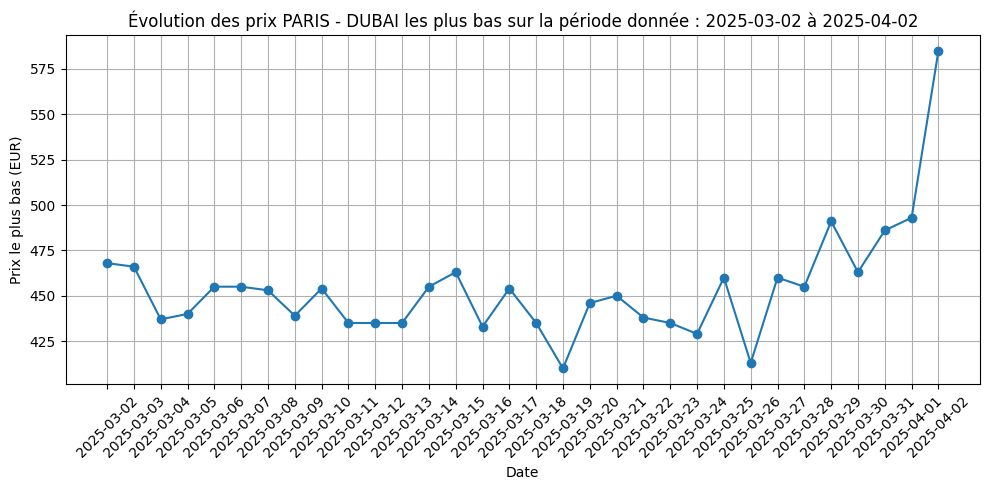

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_cheapest_fligt['date'], df_cheapest_fligt['lowest_price'], marker='o')
plt.xlabel('Date')
plt.ylabel(f'Prix le plus bas ({currency})')
plt.title('Évolution des prix PARIS - DUBAI les plus bas sur la période donnée : 2025-03-02 à 2025-04-02')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#Prédire les émissions de CO₂ pour un vol donné et les visualiser

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

departure_id = 'CDG'  
arrival_id = 'DXB'    
start_date = datetime(2025, 3, 2)  
end_date = datetime(2025, 4, 2)    
currency = 'EUR'
API_KEY_NEW = os.getenv("API_KEY_NEW")


flights_emission_data = []
current_date = start_date
while current_date <= end_date:
    outbound_date = current_date.strftime('%Y-%m-%d')
    params = {
        'api_key': API_KEY_NEW,
        'engine': 'google_flights',
        'departure_id': departure_id,
        'arrival_id': arrival_id,
        'outbound_date': outbound_date,
        'return_date': '2025-04-02',  
        'currency': currency,
    }
    
    response = requests.get('https://serpapi.com/search', params=params)
    
    if response.status_code != 200:
        print(f"Erreur API pour la date {outbound_date}: {response.status_code}")
        break

    data = response.json()
    print(f"Réponse pour {outbound_date}: {data}")  

    # Extraction des données 
    if 'best_flights' in data or 'other_flights' in data:
        all_flights = data.get('best_flights', []) + data.get('other_flights', [])
        for flight in all_flights:
            total_duration = flight.get('total_duration', None)
            carbon_emissions = flight.get('carbon_emissions', {}).get('this_flight', None)
            layovers = len(flight.get('layovers', [])) if 'layovers' in flight else 0  # Compte des escales
            
            if 'flights' in flight and flight['flights']:
                first_flight = flight['flights'][0]
                airline = first_flight.get('airline', 'Unknown')  
                airplane = first_flight.get('airplane', 'Unknown')  
            else:
                airline = 'Unknown'
                airplane = 'Unknown'
            
            if total_duration and carbon_emissions:
                flights_emission_data.append({
                    'date': outbound_date,
                    'total_duration': total_duration,
                    'carbon_emissions': carbon_emissions,
                    'layovers': layovers,
                    'airline': airline,
                    'airplane': airplane,
                })
    
    current_date += timedelta(days=1)


if flights_emission_data:
    df_emissions = pd.DataFrame(flights_emission_data)
    # Sauvegarder dans un fichier CSV
    df_emissions.to_csv('flights_emissions_data.csv', index=False)
    print(df_emissions)
else:
    print("Aucune donnée récupérée.")

Réponse pour 2025-03-02: {'search_metadata': {'id': '67575310d879184be8e728c5', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/4e27169de869b70c/67575310d879184be8e728c5.json', 'created_at': '2024-12-09 20:29:04 UTC', 'processed_at': '2024-12-09 20:29:04 UTC', 'google_flights_url': 'https://www.google.com/travel/flights?hl=en&gl=us&curr=EUR&tfs=CBwQAhoeEgoyMDI1LTAzLTAyagcIARIDQ0RHcgcIARIDRFhCGh4SCjIwMjUtMDQtMDJqBwgBEgNEWEJyBwgBEgNDREdCAQFIAXABmAEB', 'raw_html_file': 'https://serpapi.com/searches/4e27169de869b70c/67575310d879184be8e728c5.html', 'prettify_html_file': 'https://serpapi.com/searches/4e27169de869b70c/67575310d879184be8e728c5.prettify', 'total_time_taken': 0.8}, 'search_parameters': {'engine': 'google_flights', 'hl': 'en', 'gl': 'us', 'departure_id': 'CDG', 'arrival_id': 'DXB', 'outbound_date': '2025-03-02', 'return_date': '2025-04-02', 'currency': 'EUR'}, 'best_flights': [{'flights': [{'departure_airport': {'name': 'Paris Charles de Gaulle Airport', 'id':

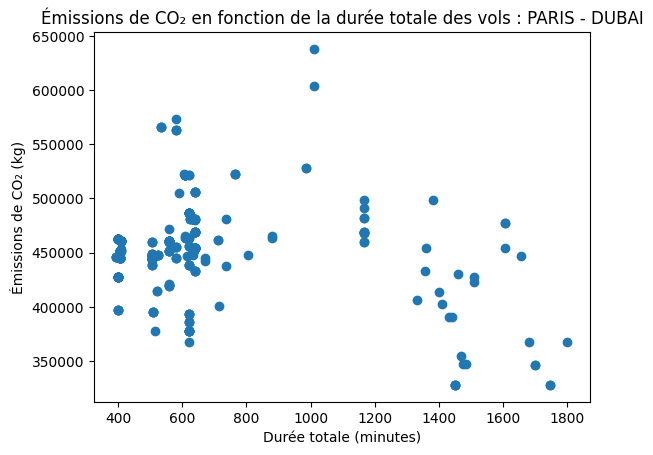

In [67]:
import matplotlib.pyplot as plt

plt.scatter(df_emissions['total_duration'], df_emissions['carbon_emissions'])
plt.title("Émissions de CO₂ en fonction de la durée totale des vols : PARIS - DUBAI")
plt.xlabel("Durée totale (minutes)")
plt.ylabel("Émissions de CO₂ (kg)")
plt.show()


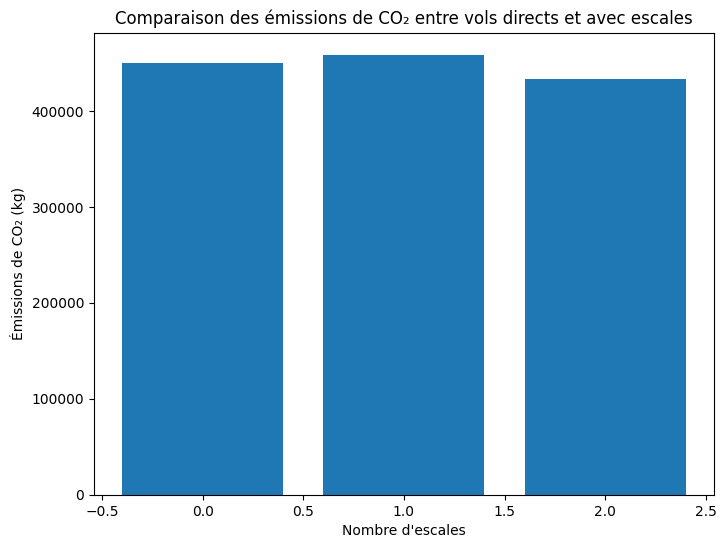

In [ ]:
# Visualisation de l'analyse des émissions
avg_emissions = df_emissions.groupby('layovers')['carbon_emissions'].mean().reset_index()
#'Direct' if layovers == 0 else 'Avec escales'

plt.figure(figsize=(8, 6))
plt.bar(avg_emissions['layovers'], avg_emissions['carbon_emissions'])
plt.title('Comparaison des émissions de CO₂ entre vols directs et avec escales')
plt.xlabel('Nombre d\'escales')
plt.ylabel('Émissions de CO₂ (kg)')
plt.show()

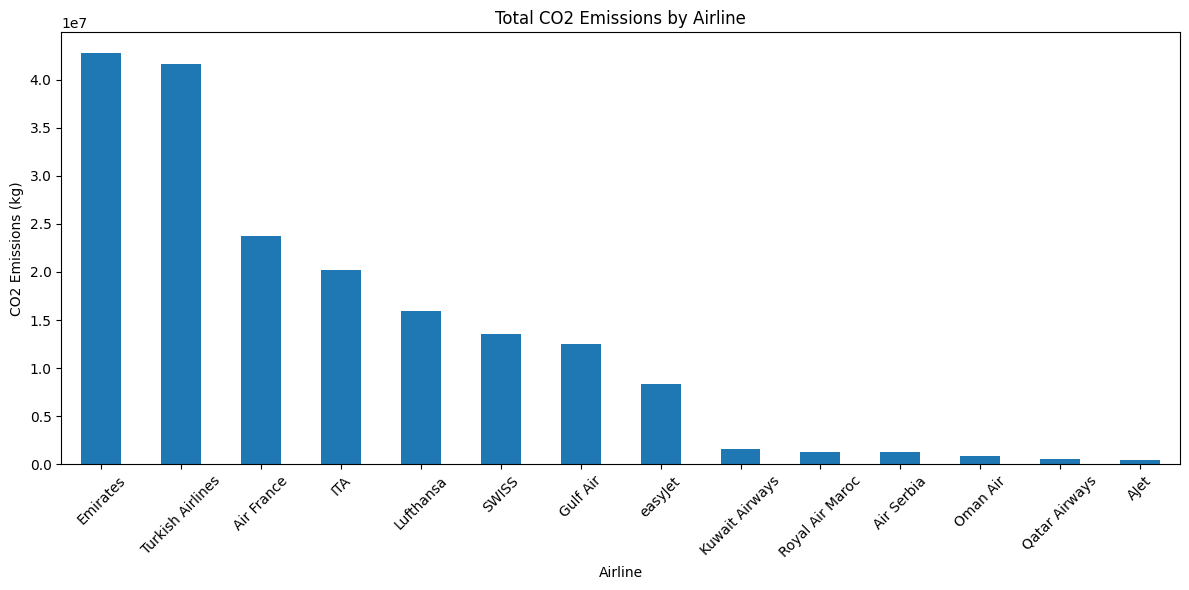

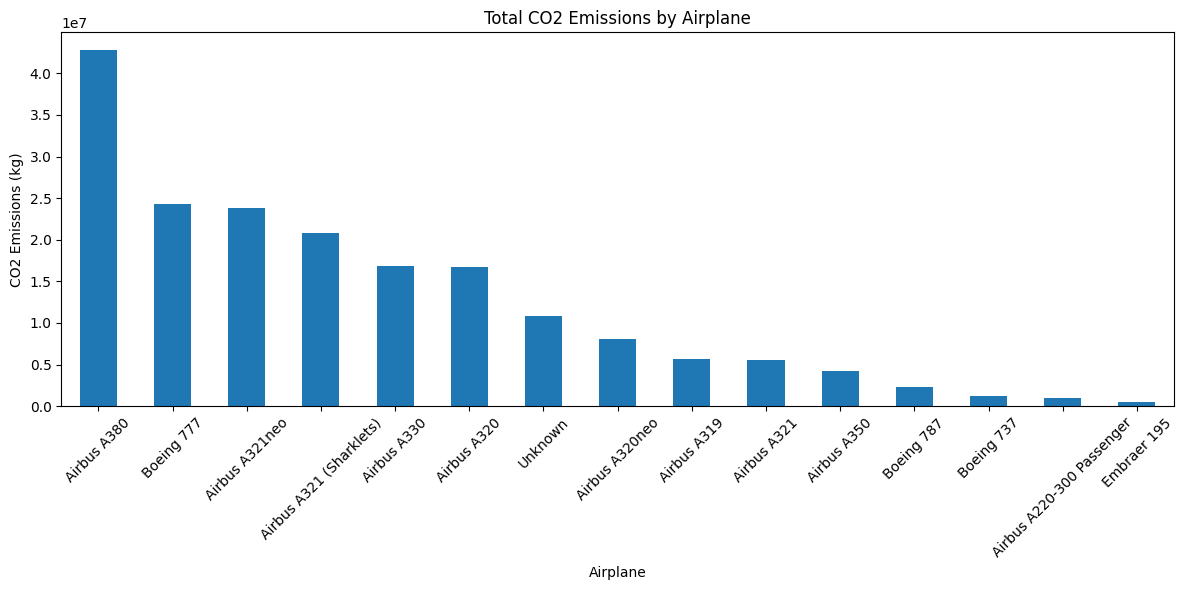

In [70]:
# Groupement par compagnie aérienne (airline) pour la somme des émissions de CO2
co2_by_airline = df_emissions.groupby('airline')['carbon_emissions'].sum().sort_values(ascending=False)

# Visualisation : CO2 total par compagnie aérienne
plt.figure(figsize=(12, 6))
co2_by_airline.plot(kind='bar')
plt.title('Total CO2 Emissions by Airline')
plt.ylabel('CO2 Emissions (kg)')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Groupement par type d'avion (airplane) pour la somme des émissions de CO2
co2_by_airplane = df_emissions.groupby('airplane')['carbon_emissions'].sum().sort_values(ascending=False)

# Visualisation : CO2 total par type d'avion
plt.figure(figsize=(12, 6))
co2_by_airplane.plot(kind='bar')
plt.title('Total CO2 Emissions by Airplane')
plt.ylabel('CO2 Emissions (kg)')
plt.xlabel('Airplane')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()